In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import sklearn
from sklearn import svm
from sklearn import cross_validation as cv
import sklearn.preprocessing
%matplotlib inline

In [55]:
clf = svm.OneClassSVM(nu=10**(-3), kernel="rbf", gamma=1)
data = np.zeros((1000,1))
data[:,0] = 2*(-0.5 + np.random.rand(1000))
clf.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1, kernel='rbf',
      max_iter=-1, nu=0.001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

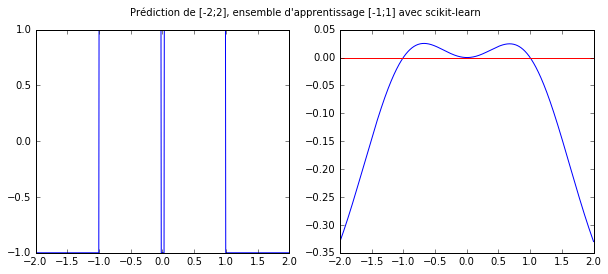

In [56]:
x=np.linspace(-2,2,1000)
y = list(map(lambda x :clf.predict(x),x))
#fig = plt.figure()
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(10, 4)
ax1.plot(x,y)
y = list(map(lambda x : clf.decision_function(x)[0][0],x))
ax2.plot(x,y)
ax2.plot(x,np.zeros((np.shape(x))),'r')
f.suptitle("Prédiction de [-2;2], ensemble d'apprentissage [-1;1] avec scikit-learn")
f.savefig("predict_sklearn.pdf",format = 'pdf')

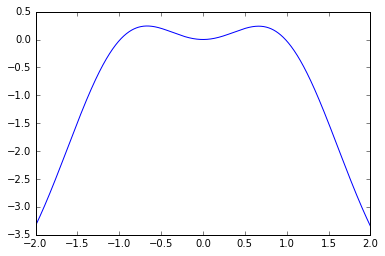

In [20]:
y = list(map(lambda x : clf.decision_function(x)[0][0],x))
plt.plot(x,y)

# Rythme cardiaque

In [8]:
def load_cardiac(filename):
    with open(filename ,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f]
    tmp = np.array(data)
    return tmp[:,:-1],tmp[:,-1].astype(int)

data_card,y_card = load_cardiac("card_clean.txt")
data_card = sklearn.preprocessing.scale(data_card,axis=0)

In [9]:
data_card_ok = data_card[y_card == 1]
data_card_dead = data_card[y_card != 1]
data_card_train,data_card_test=cv.train_test_split(data_card_ok,test_size=0.2)

In [12]:
card_osvm = svm.OneClassSVM(nu=0.03,gamma = 0.95*10**(-2))
card_osvm.fit(data_card_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0095, kernel='rbf',
      max_iter=-1, nu=0.03, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [13]:
print("Test données entrainement : ", sum(0.5*(1+card_osvm.predict(data_card_train)))/len(data_card_train))
print("Test données validation : ", sum(0.5*(1+card_osvm.predict(data_card_test)))/len(data_card_test))
print("Test données ok: ", sum(0.5*(1+card_osvm.predict(data_card_ok)))/len(data_card_ok))
print("Test données dead: ", sum(0.5*(1+card_osvm.predict(data_card_dead)))/len(data_card_dead))

Test données entrainement :  0.825641025641
Test données validation :  0.775510204082
Test données ok:  0.815573770492
Test données dead:  0.28640776699


In [8]:
test_plt.savefig(predict_sklearn)

AttributeError: 'list' object has no attribute 'savefig'